# Decision Tree


In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Recreate the initial dataset
data = {
    'Age': [22, 25, 47, 35, 46, 55, 67, np.nan, 30, 78, 29, 33, 80, 90, 21, 22, np.nan, 55, 60, 75,
            150, 160, -10, 200, 5, 100, 110, 45, 40, 95],
    'Salary': [30, np.nan, 47, 50, 52, 65, 78, 40, np.nan, 85, 48, 50, 90, 110, 20, 28, 100, 65, 72, 88,
               250, 300, 5, 400, 10, 150, 170, 60, 55, np.nan],
    'Purchased': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)
df.head(10)



,Age,Salary,Purchased
0,22.0,30.0,0
1,25.0,NaN,1
2,47.0,47.0,0
3,35.0,50.0,1
4,46.0,52.0,0
5,55.0,65.0,1
6,67.0,78.0,0
7,NaN,40.0,1
8,30.0,NaN,1
9,78.0,85.0,0


In [6]:
### Data Preprocessing ###

# Step 1: Fill missing values with mean for 'Age' and 'Salary'
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

df.head(10)

,Age,Salary,Purchased
0,22.000000,30.000000,0
1,25.000000,93.259259,1
2,47.000000,47.000000,0
3,35.000000,50.000000,1
4,46.000000,52.000000,0
5,55.000000,65.000000,1
6,67.000000,78.000000,0
7,63.035714,40.000000,1
8,30.000000,93.259259,1
9,78.000000,85.000000,0


In [8]:
# Step 2: Identify outliers using Z-score method
df['Z_score_Age'] = stats.zscore(df['Age'])
df['Z_score_Salary'] = stats.zscore(df['Salary'])

# Define the Z-score threshold for outliers
threshold = 3

# Remove outliers
df_clean = df[(df['Z_score_Age'].abs() <= threshold) & (df['Z_score_Salary'].abs() <= threshold)]

# Drop Z-score columns
df_clean = df_clean.drop(columns=['Z_score_Age', 'Z_score_Salary'])

# Display cleaned data
print("Cleaned Data:")
df_clean.head(10)


Cleaned Data:


,Age,Salary,Purchased
0,22.000000,30.000000,0
1,25.000000,93.259259,1
2,47.000000,47.000000,0
3,35.000000,50.000000,1
4,46.000000,52.000000,0
5,55.000000,65.000000,1
6,67.000000,78.000000,0
7,63.035714,40.000000,1
8,30.000000,93.259259,1
9,78.000000,85.000000,0


In [10]:
# Step 3: Split the data into features (X) and target (y)
X = df_clean[['Age', 'Salary']]
y = df_clean['Purchased']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Step 4: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
# Step 5: Make predictions and evaluate accuracy
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree: {accuracy:.2f}")

Accuracy of the Decision Tree: 0.67


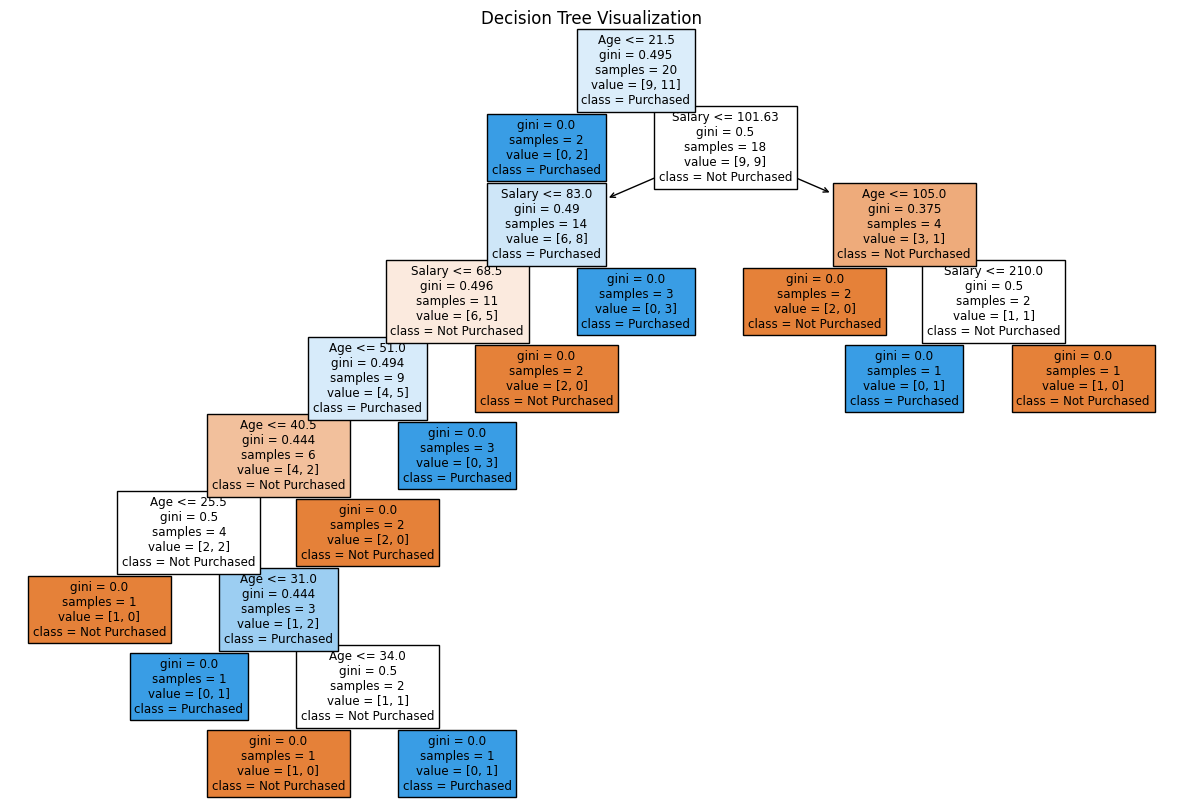

In [13]:
# Step 6: Visualize the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier, feature_names=['Age', 'Salary'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [14]:
from sklearn.tree import export_text

# Export the rules as text
rules = export_text(dt_classifier, feature_names=['Age', 'Salary'])
print(rules)

|--- Age <= 21.50
|   |--- class: 1
|--- Age >  21.50
|   |--- Salary <= 101.63
|   |   |--- Salary <= 83.00
|   |   |   |--- Salary <= 68.50
|   |   |   |   |--- Age <= 51.00
|   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  25.50
|   |   |   |   |   |   |   |--- Age <= 31.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  31.00
|   |   |   |   |   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  34.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  40.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  51.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- Salary >  68.50
|   |   |   |   |--- class: 0
|   |   |--- Salary >  83.00
|   |   |   |--- class: 1
|   |--- Salary >  101.63
|   |   |--- Age <= 105.00
|   |  